## Libraries

In [2]:
import os
import re
import numpy as np

# visualisation
from IPython.core import display as ICD

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_context("talk")
sns.set_style('darkgrid')
sns.set_palette('Set2')

import tabula
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'figure.figsize': (15, 5), 'figure.dpi': 120})

# warnings ignore
import warnings
warnings.filterwarnings('ignore')

## Data fetching

In [3]:
path_data = os.path.join("..//data//raw//data.pdf")
path_test = os.path.join("..//data//raw//test.pdf")
path_test2 = os.path.join("..//data//raw//test2.pdf")

## Data parsing

In [195]:
# parse pdf scanned document with tables into a pandas dataframe
data_dfs = tabula.read_pdf(path_data, pages="all", stream=True)

In [196]:
# parse tables containing pdf scanned document into a pandas dataframe
for df in data_dfs:
    ICD.display(df)
    if df.shape[0] > 0:
        print(df.info())

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  6 non-null      float64
 1   Sepal.Width   6 non-null      float64
 2   Petal.Length  6 non-null      float64
 3   Petal.Width   6 non-null      float64
 4   Species       6 non-null      object 
dtypes: float64(4), object(1)
memory usage: 368.0+ bytes
None


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,145,6.7,3.3,5.7,2.5,virginica
1,146,6.7,3.0,5.2,2.3,virginica
2,147,6.3,2.5,5.0,1.9,virginica
3,148,6.5,3.0,5.2,2.0,virginica
4,149,6.2,3.4,5.4,2.3,virginica
5,150,5.9,3.0,5.1,1.8,virginica


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6 non-null      int64  
 1   Sepal.Length  6 non-null      float64
 2   Sepal.Width   6 non-null      float64
 3   Petal.Length  6 non-null      float64
 4   Petal.Width   6 non-null      float64
 5   Species       6 non-null      object 
dtypes: float64(4), int64(1), object(1)
memory usage: 416.0+ bytes
None


,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     15 non-null     float64
 1   supp    15 non-null     object 
 2   dose    15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 488.0+ bytes
None


In [199]:
# parse second given document (image) into a pandas dataframe
test_dfs = tabula.read_pdf(path_test, pages="all", multiple_tables=True, lattice=True)

In [200]:
# display parsed tables from test document
for df in test_dfs:
    ICD.display(df)
    if df.shape[0] > 0:
        print(df.info())

,Contract Details,Unnamed: 0


,HPC Contract Number,Unnamed: 0,UK4101
0,Batch / Package to be\rreleased to HPC requiri...,NaN,Bundle B-001 bis
1,Supplier Concerned,NaN,REEL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HPC Contract Number  2 non-null      object 
 1   Unnamed: 0           0 non-null      float64
 2   UK4101               2 non-null      object 
dtypes: float64(1), object(2)
memory usage: 176.0+ bytes
None


,Details of Surveillance Offer


,Manufacturing\rSurveillance Offer\rReference,Unnamed: 0,D309520005884 ind.B
0,DI/EIRA Manufacturing\rSurveillance Level,NaN,DI SL2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
Reference  1 non-null      object 
 1   Unnamed: 0                                  0 non-null      float64
 2   D309520005884 ind.B                         1 non-null      object 
dtypes: float64(1), object(2)
memory usage: 152.0+ bytes
None


,Status of In-factory Inspections


,Completion of Inspection Guides


,Surveillance Guides\rScheduled in Surveillance\rOffer,Unnamed: 0,A521,BM901,B512,B514,B516,B524,B534,B598,E900,B551,B552,B535,B543,B561,B562,B575,B572,BM910,BM911,BM912,BM913,BM915,BM918,B531,D512,D522,D537,DM934,B542,DM931,DM932
0,Additional Guides\rprogrammed by Inspector\rin...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name of Guide,NaN,Welding\rProcedure,Kick-Off\rManufacturing,Pre-\rrequisites\rrelease,Examination\rof sub-orders,Sub-suppliers\rsurveillance,Store\rentrance\rcontrol,Heat\rTreatments,Filler Materials,Measurement\rTools,Welding pre-\rrequisites,Welding,Identification\r-Marking,Cleaning,Dimensional\rinterchangea\rbility,Assembling,Tests:\rsampling of\rspecimen,Mechanical\rTests,RT- Film\rdevelopment,Radiographic\rTest,Radiogram\rInterpretatio\rn,Ultrasonic\rTests,Penetrant\rTests,Visual Tests,"Parts, tubes,\rforged\rfittings,\rrolled,",Performance\rtest,Final Visual\rInspection -\rpackaging -\rpacking,RT - Film\rtransfer,Check of the\rconformity to\rthe\rEdf order,Painting,End of\rManufacturin\rg Reports,Non\rconformities
2,Scheduled Frequency (as in\rSurveillance Offer),NaN,1,1,1,1,1,1,1 per HT type,1,1,1,1 action will be\rperformed:\r-Per welding\rpr...,1 per\requipment,1 per\requipment,1 per\requipment,1,1 per sub-\rsupplier,1 per sub-\rsupplier,1,1,1,1,1 per\requipment,1 per\requipment,1,1,1 per\requipment,Each\roccurrence\rshall be\rattended,1,1,1,1
3,Actual Frequency\rcompleted,NaN,0,0,4,1,1,1,1,0,1,1,13,3,1,3,1,NaN,NaN,1,1,1,1,5,4,0,0,0,0,0,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
Offer  4 non-null      object 
 1   Unnamed: 0                                           0 non-null      float64
 2   A521                                                 3 non-null      object 
 3   BM901                                                3 non-null      object 
 4   B512                                                 4 non-null      object 
 5   B514                                                 3 non-null      object 
 6   B516                                                 3 non-null      object 
 7   B524                                                 3 non-null      object 
 8   B534                                                 3 non-null      object 
 9   B598                                       

,Activity\rcancelled\rby\rSupplier,Activity\rMissed by\rInspector,Activity\rhasn't\roccured\ryet


,Inspection and Surveillance Clearance Note


,Topic,Unnamed: 0,Response,Comments,Notes,Responsibility
0,Has inspection frequency\rtarget been achieved...,NaN,Y,Except for activities that haven't occured yet,Note: This relates to the completeness of the\...,Activity\rPilot/Region\rLeader
1,"If inspection target has not\rbeen achieved, i...",NaN,N,NaN,"For example, provide list of the guides that h...",Activity\rPilot/Region\rLeader
2,NaN,NaN,NaN,NaN,NaN,NaN
3,"If inspection target has not\rbeen achieved, p...",NaN,Y,NaN,For example: Provide argues that the guides no...,Activity\rPilot/Region\rLeader
4,NaN,NaN,NaN,NaN,NaN,NaN
5,No. of Observation Sheets\rraised,NaN,NaN,N/A,N/A,Activity\rPilot/Region\rLeader
6,Have all observation sheets\rbeen satisfactori...,NaN,NaN,N/A,1) Provide list of Open Observation Sheets.\r2...,Activity\rPilot/Region\rLeader
7,Should a final Inspection\rbe targeted before ...,NaN,N,NaN,"If targeted, a flash report will be required w...",Equipment\rEngineer/Inspec\rtion Pilot


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Topic           6 non-null      object 
 1   Unnamed: 0      0 non-null      float64
 2   Response        4 non-null      object 
 3   Comments        3 non-null      object 
 4   Notes           6 non-null      object 
 5   Responsibility  6 non-null      object 
dtypes: float64(1), object(5)
memory usage: 512.0+ bytes
None


,Completion Contact Details


,Role,Unnamed: 0,Name,Date
0,Activity Pilot -AP (for\rEMIB)\rRegion Leader ...,NaN,S.FREDJ,Feb 22th\r2022
1,Equipment Engineer -EE\r(for EMIB)\rInspection...,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Role        2 non-null      object 
 1   Unnamed: 0  0 non-null      float64
 2   Name        1 non-null      object 
 3   Date        1 non-null      object 
dtypes: float64(1), object(3)
memory usage: 192.0+ bytes
None


In [130]:
# parse second given document (image) into a pandas dataframe
test2_dfs = tabula.read_pdf(path_test2, pages="all", multiple_tables=True, stream=True)

In [129]:
test2_dfs

[]

TypeError: Image data of dtype object cannot be converted to float

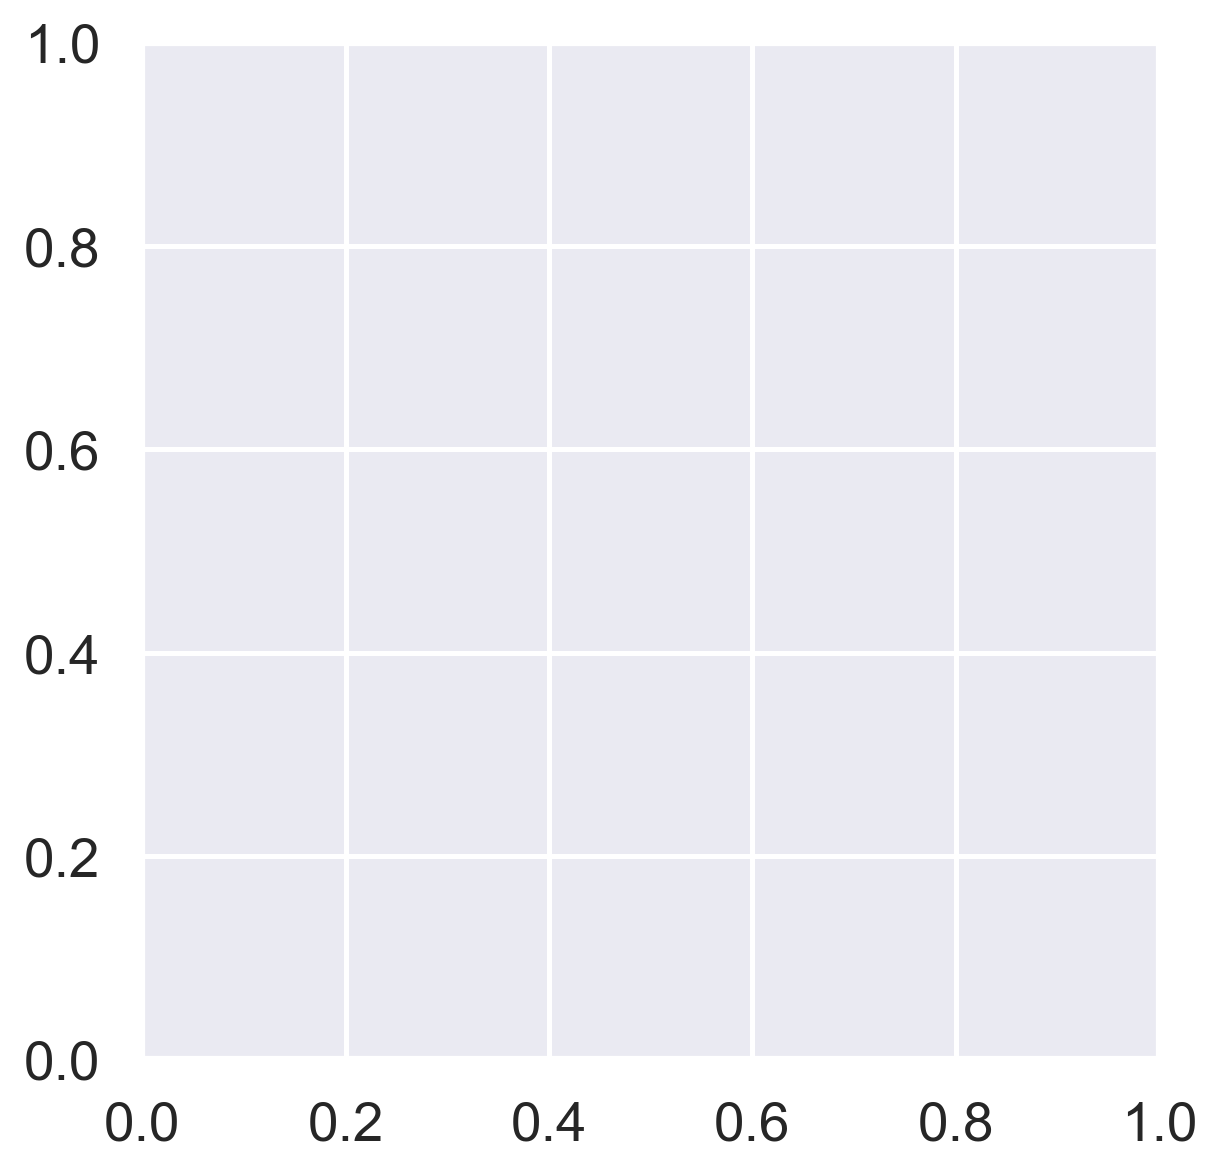

In [4]:
img = cv2.imread(path_test2, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
plt.show()

## Database connection

In [41]:
# define function for connection and data injection into given database
def data_injection(doc_path: str, db_type: str, db_connector: str, user_name: str, password: str, host_name: str, db_addr: str, db_name: str):
    """
    Function to inject data into a given RDBMS (relational database management system)

    Parameters
    ----------
    doc_path: str
        Document's path to parse.
    db_type: str 
        Specifies the kind (dialect) of database we're connecting to. SQLAlchemy can interface with all mainstream flavors of relational databases. Here are some databases examples:
            MySQL: mysql
            PostgreSQL: postgresql
            SQLite: sqlite
            Oracle (ugh): oracle
            Microsoft SQL (slightly less exasperated "ugh"): mssql
    db_connector: str
        To manage your database connections, SQLAlchemy leverages whichever Python database connection library you chose to use. Here are the libraries recommended per dialect:
            MySQL: pymysql, mysqldb
            PostgreSQL: psycopg2, pg8000
            SQLite: (none needed)
            Oracle: cx_oracle
            Microsoft SQL: pymssql, pyodbc
    user_name: str
        Name of the user to connect with.
    password: str
        User's password.
    host_name: str
        Name or IP address of the server host.
    db_addr: str
        TCP/IP port.
    db_name: str 
        Name of the database to define if not already exists.
    """

    """Unit testing"""
    from IPython.core import display as ICD

    def check_connexion(engine_obj: object):
        """
        Unit testing function to check connection status with chosen database

        Parameters
        ---------
        engine: object
            Defined engine to establish connection with given parameters

        Returns
        -------
        Raising AssertionError if connection failed
        """
        from sqlalchemy.exc import SQLAlchemyError

        try:
            if not database_exists(engine_obj.url):
                create_database(engine_obj.url)
                print("Connection succeeded")
            else:
                engine.connect()
                print("Connection succeeded")
        except SQLAlchemyError as err:
            print(f"Connection failed because of: {err.__cause__}")

    """Extract tables from pdf document given url"""
    import tabula

    data_dfs = tabula.read_pdf(
        doc_path, pages="all", multiple_tables=True)

    # define fucntion to process data before injection into chosen database
    def clean_pdf(tables: list):
        """
        Function to clean tables parsed from the document with framed tables
        
        Parameters
        ----------
        tables: list
            Array containing document's parsed tables 
        """
        import pickle

        # define appropriate parsing method for given document
        if tables[-1].shape[1] < 3:
            # define appropraite parsing method
            tables = tabula.read_pdf(
            doc_path, pages="all", multiple_tables=True, stream=True)

            # drop empty rows
            tables.dropna(how="all", inplace=True)

            # define tables array length (number of parsed tables)
            length = (len(tables))

            # rename if column 'Unnamed'
            for i in range(length):
                if 'Unnamed: 0' in tables[i].columns:
                    tables[i] = tables[i].rename(columns={'Unnamed: 0': 'colonne_1'})

            # drop column 'Unamed' if dtype int
            for i in range(length):
                if 'colonne_1' in tables[i].columns:
                    if tables[i]['colonne_1'].dtypes == 'int64':
                        tables[i] = tables[i].drop(['colonne_1'], axis=1)

            # merge parsed tables if with columns matching
            table_nb = []
            for i in reversed(range(length)):
                if i not in table_nb:
                    table_nb.append(i)
                for e in reversed(range(length)):
                    if (i != e) and (e not in table_nb) and (pickle.dumps(tables[i].columns) == pickle.dumps(tables[e].columns)):
                                tables[i] = (tables[i].append(tables[e])).reset_index(drop=True)
                                del tables[e]
        elif tables[0].shape[0] > 0:
            tables = tabula.read_pdf(
                doc_path, pages="all", multiple_tables=True, lattice=True)
            tables = [table.drop("Unnamed: 0", axis=1, errors="ignore").dropna(how="all") for table in tables]

        # return processed tables
        return tables

    # instantiate preprocessing function to define parsed tables variable
    data_dfs = clean_pdf(tables=data_dfs)
    
    """Create database connection"""
    from sqlalchemy import create_engine
    from sqlalchemy_utils import database_exists, create_database

    db_uri = f"{db_type}+{db_connector}://{user_name}:{password}@{host_name}:{db_addr}/{db_name}"

    engine = create_engine(
        db_uri,
        connect_args={
            "ssl": {
                "ssl_ca": "/home/gord/client-ssl/ca.pem",
                "ssl_cert": "/home/gord/client-ssl/client-cert.pem",
                "ssl_key": "/home/gord/client-ssl/client-key.pem"
            }},
        echo=True,
    )

    # unit testing db connection status
    check_connexion(engine)

    """Data injection"""
    for i, df in enumerate(data_dfs):
        if df.shape[0] > 0:
            if data_dfs[i-1].shape[0] == 0:
                df_title = data_dfs[i-1].columns[0]
                df.to_sql(df_title, con=engine,
                          if_exists='replace', index=False)
            else:
                df.to_sql(f"table_{i}", con=engine,
                          if_exists='replace', index=False)
        else:
            continue
        

In [43]:
# instantiate function to parse/inject data into a database
data_injection(path_test, "mysql", "pymysql", "root", "root", "localhost", "3306", "ocr_db")

Connection succeeded
2022-03-18 12:18:57,799 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2022-03-18 12:18:57,800 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-18 12:18:57,801 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2022-03-18 12:18:57,802 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-18 12:18:57,803 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2022-03-18 12:18:57,804 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-03-18 12:18:57,806 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2022-03-18 12:18:57,806 INFO sqlalchemy.engine.Engine [generated in 0.00045s] {'table_schema': 'ocr_db', 'table_name': 'Contract Details'}
2022-03-18 12:18:57,808 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-03-18 12:18:57,809 INFO sqlalchemy.engine.Engine 
CREATE TABLE `Contract Details` (
	`HPC Contract Number` TEXT, 
	`UK4101` TEXT
)


2022-03-18 12:18:57,809 INFO 